In [1]:
import sys

import correlate
import matplotlib.pyplot as plt

sys.path.append('../radiospectra2')

from Orfees_read import *

the Orfees methods are imported....


/tmp/pycharm_project_368/validation/Orfees/Orfees_read.py:222: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(dates[::int(len(dates) // 30)], rotation=50, horizontalalignment="right")


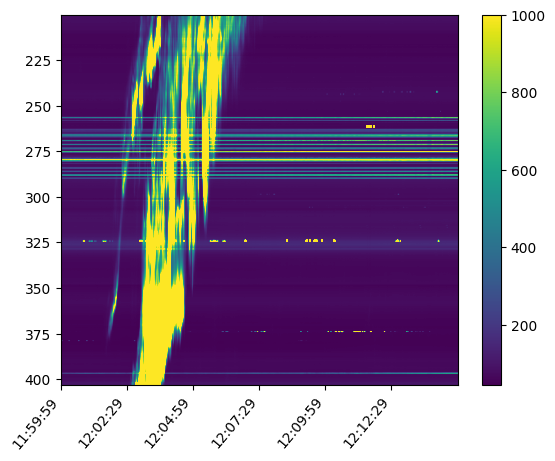

In [2]:
orfees = OrfeesSpectrogram("./orfees_files/int_orf20151104_120000_0.1_test.fts")
spec = CallistoSpectrogram.from_url('http://soleil.i4ds.ch/solarradio/data/2002-20yy_Callisto/2015/11/04/BIR_20151104_120000_03.fit.gz')

orfees.plot_range_freq(spec)

<AxesSubplot: xlabel='Time [UT]', ylabel='Frequency [MHz]'>

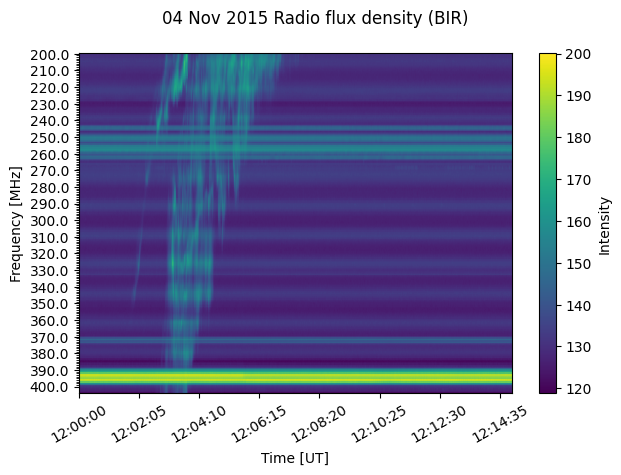

In [81]:
spec.plot()

/tmp/pycharm_project_368/validation/Orfees/Orfees_read.py:179: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(dates[::int(len(dates) // 30)], rotation=50, horizontalalignment="right")


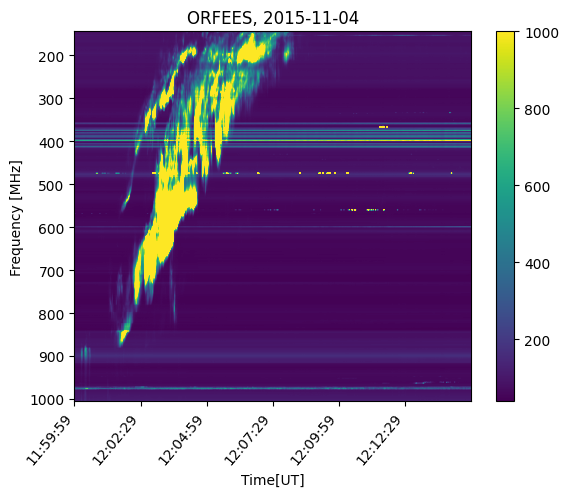

In [3]:
orfees.peek()

/tmp/ipykernel_14997/854610329.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(dates[::int(len(dates)//30)], rotation=50, horizontalalignment="right")


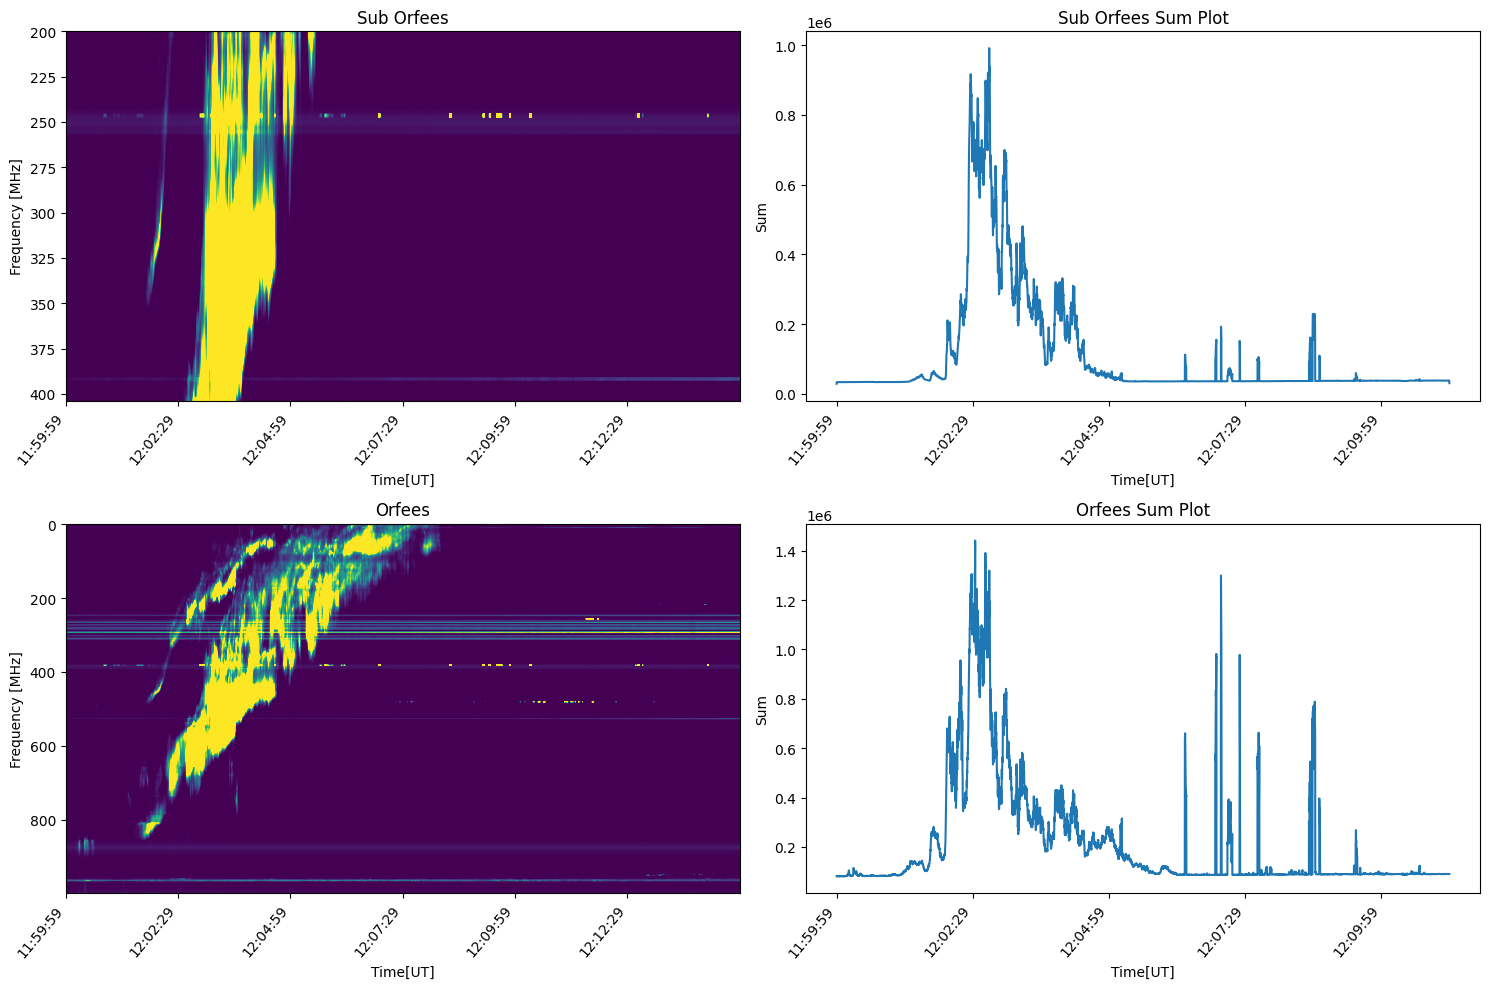

In [3]:
from scipy import signal
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from Orfees_read import OrfeesSpectrogram

orfees = OrfeesSpectrogram("./orfees_files/int_orf20151104_120000_0.1_test.fts")
dates = orfees.convert_ms_to_date()

_data, min_freq, max_freq, range = orfees.range_pix(spec)
filtered_data = signal.medfilt2d(_data, 3)

plt.rcParams["figure.autolayout"] = True

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Set the same major locator and tick labels for both time axes
for ax_row in axs:
    for ax in ax_row:
        ax.xaxis.set_major_locator(MaxNLocator(prune='both', nbins=6))
        ax.set_xticklabels(dates[::int(len(dates)//30)], rotation=50, horizontalalignment="right")

# Subplot 1: Filtered Data
axs[0, 0].imshow(filtered_data, vmin=100, vmax=1000, aspect="auto")
axs[0, 0].set_title("Sub Orfees")
axs[0, 0].set_ylim(max_freq, min_freq)
axs[0, 0].set_xlabel('Time[UT]')
axs[0, 0].set_ylabel('Frequency [MHz]')

# Subplot 2: Original Data
axs[1, 0].imshow(orfees.data, vmin=100, vmax=1000, aspect="auto")
axs[1, 0].set_title("Orfees")
axs[1, 0].set_xlabel('Time[UT]')
axs[1, 0].set_ylabel('Frequency [MHz]')

# Subplot 3: Filtered Data Sum Plot
axs[0, 1].plot(filtered_data.sum(axis=0))
axs[0, 1].set_title("Sub Orfees Sum Plot")
axs[0, 1].set_xlabel('Time[UT]')
axs[0, 1].set_ylabel('Sum')

# Subplot 4: Original Data Sum Plot
axs[1, 1].plot(orfees.data.sum(axis=0))
axs[1, 1].set_title("Orfees Sum Plot")
axs[1, 1].set_xlabel('Time[UT]')
axs[1, 1].set_ylabel('Sum')

plt.tight_layout()  # Adjusts the spacing between subplots
plt.show()

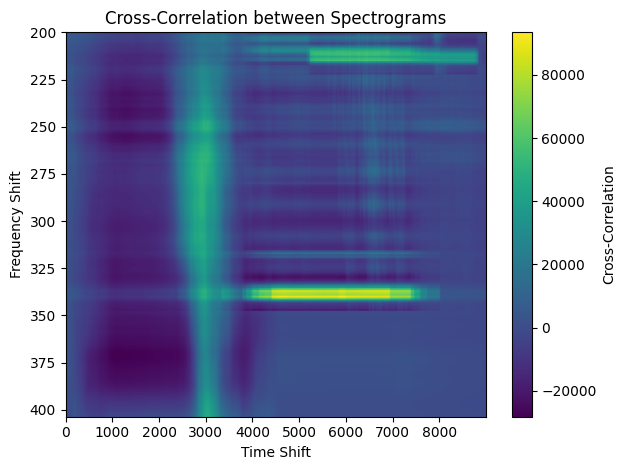

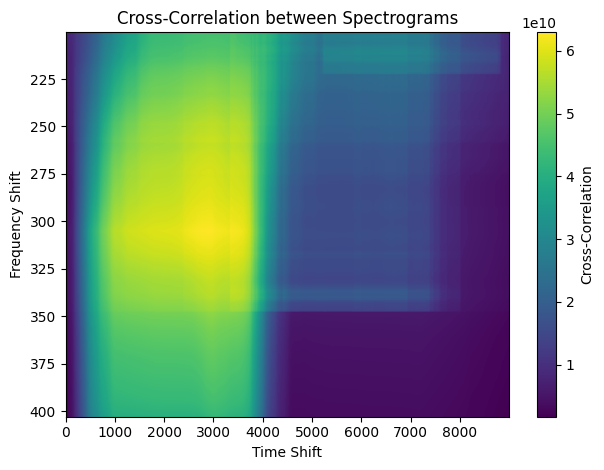

In [7]:
from scipy.signal import spectrogram, correlate
orfees = OrfeesSpectrogram("./orfees_files/int_orf20151104_120000_0.1_test.fts")
spec = CallistoSpectrogram.from_url(
    'http://soleil.i4ds.ch/solarradio/data/2002-20yy_Callisto/2015/11/04/BIR_20151104_120000_03.fit.gz')

min_freq = spec.freq_axis.min()
max_freq = spec.freq_axis.max()

# Filter the frequency range
mask = (orfees.freq_axis > min_freq) & (orfees.freq_axis < max_freq)
range_freq = orfees.freq_axis[mask]
range_pixels = orfees.data[mask, :]

# Assuming you have two normalized spectrogram matrices: range_pixels and spec.data
eca_data = spec.data
# Normalize the spectrogram matrices
spectrogram1 = (range_pixels - np.mean(range_pixels)) / np.std(range_pixels)
spectrogram2 = (eca_data - np.mean(eca_data)) / np.std(eca_data)

# 
# # Compute the cross-correlation using correlate2d
cross_corr = correlate(spectrogram1, spectrogram2, mode='same')

# # Visualize the cross-correlation matrix
plt.imshow(cross_corr, aspect='auto', origin='lower')
plt.ylim(max_freq, min_freq)
plt.colorbar(label='Cross-Correlation')

plt.title('Cross-Correlation between Spectrograms')
plt.xlabel('Time Shift')
plt.ylabel('Frequency Shift')
plt.show()

## this is without Normalization
cross_corr = correlate(range_pixels, spec.data, mode="same")
plt.imshow(cross_corr, aspect='auto')
plt.ylim(max(range_freq), min(range_freq))
plt.colorbar(label='Cross-Correlation')
plt.title('Cross-Correlation between Spectrograms')
plt.xlabel('Time Shift')
plt.ylabel('Frequency Shift')
plt.show()

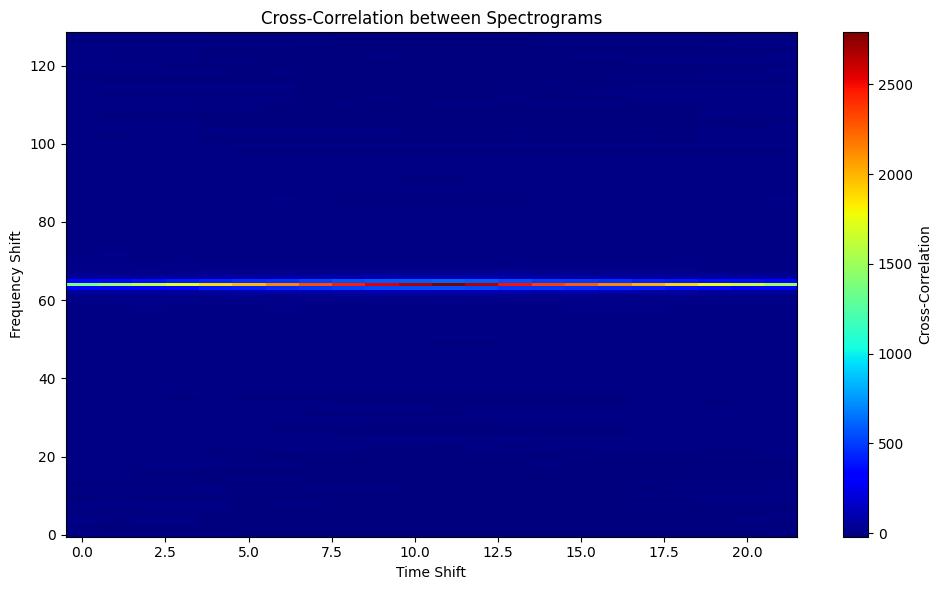

In [8]:
import numpy as np
from scipy.signal import spectrogram, correlate
import matplotlib.pyplot as plt

# Generate example signals
sampling_rate = 1000  # Sampling rate in Hz
t = np.linspace(0, 5, 5 * sampling_rate)  # Time vector
signal1 = np.sin(2 * np.pi * 5 * t) + np.random.normal(0, 0.5, len(t))
signal2 = np.cos(2 * np.pi * 5 * t) + np.random.normal(0, 0.5, len(t))

# Compute spectrograms using scipy's spectrogram function
frequencies, times, spectrogram1 = spectrogram(signal1, fs=sampling_rate)
_, _, spectrogram2 = spectrogram(signal2, fs=sampling_rate)

# Normalize the spectrogram matrices
spectrogram1_normalized = (spectrogram1 - np.mean(spectrogram1)) / np.std(spectrogram1)
spectrogram2_normalized = (spectrogram2 - np.mean(spectrogram2)) / np.std(spectrogram2)

# Compute the cross-correlation using correlate2d
cross_corr = correlate(spectrogram1_normalized, spectrogram2_normalized, mode='same')

# Visualize the cross-correlation matrix
plt.figure(figsize=(10, 6))
plt.imshow(cross_corr, cmap='jet', aspect='auto', origin='lower')
plt.colorbar(label='Cross-Correlation')
plt.title('Cross-Correlation between Spectrograms')
plt.xlabel('Time Shift')
plt.ylabel('Frequency Shift')
plt.show()

/tmp/ipykernel_14997/3648078087.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(dates[::int(len(dates)//30)], rotation=50, horizontalalignment="right")


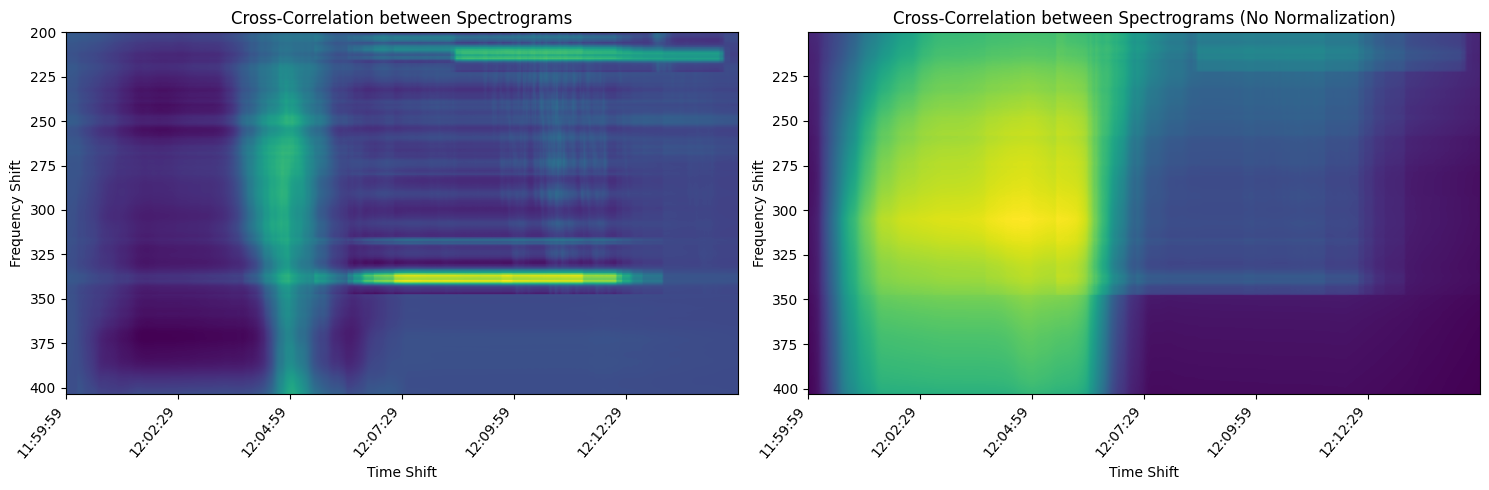

In [11]:
from scipy.signal import spectrogram, correlate
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from Orfees_read import OrfeesSpectrogram

orfees = OrfeesSpectrogram("./orfees_files/int_orf20151104_120000_0.1_test.fts")
spec = CallistoSpectrogram.from_url(
    'http://soleil.i4ds.ch/solarradio/data/2002-20yy_Callisto/2015/11/04/BIR_20151104_120000_03.fit.gz')

min_freq = spec.freq_axis.min()
max_freq = spec.freq_axis.max()

# Filter the frequency range
mask = (orfees.freq_axis > min_freq) & (orfees.freq_axis < max_freq)
range_freq = orfees.freq_axis[mask]
range_pixels = orfees.data[mask, :]

# Assuming you have two normalized spectrogram matrices: range_pixels and spec.data
eca_data = spec.data
# Normalize the spectrogram matrices
spectrogram1 = (range_pixels - np.mean(range_pixels)) / np.std(range_pixels)
spectrogram2 = (eca_data - np.mean(eca_data)) / np.std(eca_data)

plt.rcParams["figure.autolayout"] = True
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Set the same major locator and tick labels for both time axes
for ax in axs:
    ax.xaxis.set_major_locator(MaxNLocator(prune='both', nbins=6))
    ax.set_xticklabels(dates[::int(len(dates)//30)], rotation=50, horizontalalignment="right")

# Compute the cross-correlation using correlate2d
cross_corr = correlate(spectrogram1, spectrogram2, mode='same')

# Plot the cross-correlation matrix with normalization
axs[0].imshow(cross_corr, aspect='auto', origin='lower')
axs[0].set_ylim(max_freq, min_freq)
axs[0].set_title('Cross-Correlation between Spectrograms')
axs[0].set_xlabel('Time Shift')
axs[0].set_ylabel('Frequency Shift')

# Compute the cross-correlation without normalization
cross_corr_no_norm = correlate(range_pixels, eca_data, mode="same")

# Plot the cross-correlation matrix without normalization
axs[1].imshow(cross_corr_no_norm, aspect='auto', origin='lower')
axs[1].set_ylim(max(range_freq), min(range_freq))

axs[1].set_title('Cross-Correlation between Spectrograms (No Normalization)')
axs[1].set_xlabel('Time Shift')
axs[1].set_ylabel('Frequency Shift')

plt.tight_layout()  # Adjusts the spacing between subplots
plt.show()
